# <u>Penguin Species Classification
    
### Group 9  
Anggota Kelompok:  
2502021342 - Haziq Ibrahim Omar  
2540122363 - Matheus Prayogo  
2540122571 - Vimalakirti Muliawan  

[DATASET](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

[VIDEO PENJELASAN](https://binusianorg-my.sharepoint.com/personal/vimalakirti_muliawan_binus_ac_id/_layouts/15/guestaccess.aspx?guestaccesstoken=OJwI4WiP%2BB8qZfnikgLuHz%2FePT%2BaCRq5kdS25Xj%2Bot8%3D&docid=2_027558842a80a4d69b3f5353d24bde984&rev=1&e=uk47XP)

# Import Library

In [62]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

           
import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
lter=pd.read_csv('F:\ML\penguins_lter.csv')

The penguins_size file contains the same data as penguins_lter file, we use penguins_lter because it has more features to use/choose from.

In [3]:
print('lter')
lter.info()

lter
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null  

# Meaning To Each Feature
- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin gender
- Delta 15 N (o/oo)- ratio of isotope ($^{15}$N)
- Delta 13 C (o/oo)- ratio of isotope ($^{13}$C)

In [4]:
print(lter.columns)
print(lter['Species'].unique())
lter.head()

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')
['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


# Data Cleaning
We will clean the data to make it easier to read and understand.

In [5]:
new_lter=lter.copy()

new_lter['Species']=new_lter['Species'].replace({'Adelie Penguin (Pygoscelis adeliae)':'P.adeliae',
                                                 'Chinstrap penguin (Pygoscelis antarctica)':'P.antartica',
                                               'Gentoo penguin (Pygoscelis papua)':'P.papua'}) 

new_lter['Sex'].fillna('.', inplace=True)
new_lter['Sex']=new_lter['Sex'].replace({'MALE':'male','FEMALE':'female'})
new_lter['Sex']=new_lter['Sex'].replace({'.':new_lter['Sex'].mode()[0]})

new_lter['Culmen Length (mm)'].fillna(new_lter.groupby('Species')['Culmen Length (mm)'].transform('mean'),inplace=True)

new_lter['Culmen Depth (mm)'].fillna(new_lter.groupby('Species')['Culmen Depth (mm)'].transform('mean'),inplace=True)

new_lter['Flipper Length (mm)'].fillna(new_lter.groupby('Species')['Flipper Length (mm)'].transform('mean'),inplace=True)

new_lter['Body Mass (g)'].fillna(new_lter.groupby('Species')['Body Mass (g)'].transform('mean'),inplace=True)

new_lter['Delta 15 N (o/oo)'].fillna(new_lter.groupby('Species')['Delta 15 N (o/oo)'].transform('mean'),inplace=True)

new_lter['Delta 13 C (o/oo)'].fillna(new_lter.groupby('Species')['Delta 13 C (o/oo)'].transform('mean'),inplace=True)

new_lter['Body Mass (kg)']=new_lter['Body Mass (g)']/1000 

new_lter=new_lter.drop(['Body Mass (g)','studyName','Sample Number','Comments','Individual ID'], axis=1)


print(new_lter.info())
new_lter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   344 non-null    float64
 7   Culmen Depth (mm)    344 non-null    float64
 8   Flipper Length (mm)  344 non-null    float64
 9   Sex                  344 non-null    object 
 10  Delta 15 N (o/oo)    344 non-null    float64
 11  Delta 13 C (o/oo)    344 non-null    float64
 12  Body Mass (kg)       344 non-null    float64
dtypes: float64(6), object(7)
memory usage: 35.1+ KB
None


,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
0,P.adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.100000,18.700000,181.000000,male,8.859733,-25.804194,3.750000
1,P.adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.500000,17.400000,186.000000,female,8.949560,-24.694540,3.800000
2,P.adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.300000,18.000000,195.000000,female,8.368210,-25.333020,3.250000
3,P.adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,38.791391,18.346358,189.953642,male,8.859733,-25.804194,3.700662
4,P.adeliae,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.700000,19.300000,193.000000,female,8.766510,-25.324260,3.450000


Body mass converted to kg(g/1000)


Unique values of categorical data

In [6]:
print('Region', new_lter['Region'].unique())
print('Island', new_lter['Island'].unique())
print('Stage', new_lter['Stage'].unique())
print('Clutch', new_lter['Clutch Completion'].unique())

Region ['Anvers']
Island ['Torgersen' 'Biscoe' 'Dream']
Stage ['Adult, 1 Egg Stage']
Clutch ['Yes' 'No']


Variables Region and Stage only have a single value, we will drop these along with Date Egg as they will not be useful.

In [7]:
new_lter=new_lter.drop(['Region', 'Stage', 'Date Egg'], axis=1)
new_lter.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg)
0,P.adeliae,Torgersen,Yes,39.100000,18.700000,181.000000,male,8.859733,-25.804194,3.750000
1,P.adeliae,Torgersen,Yes,39.500000,17.400000,186.000000,female,8.949560,-24.694540,3.800000
2,P.adeliae,Torgersen,Yes,40.300000,18.000000,195.000000,female,8.368210,-25.333020,3.250000
3,P.adeliae,Torgersen,Yes,38.791391,18.346358,189.953642,male,8.859733,-25.804194,3.700662
4,P.adeliae,Torgersen,Yes,36.700000,19.300000,193.000000,female,8.766510,-25.324260,3.450000


## EDA


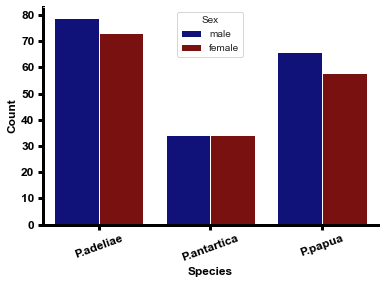

In [8]:
fig, ax=plt.subplots()

sns.countplot(data=new_lter, x='Species', hue='Sex', palette=['darkblue','darkred'])


ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=20)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Species', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Species Count.png')

The species P.adeliae has the highest occurrence, followed by P.papua and finally P.antartica

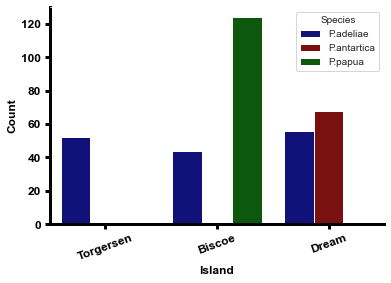

In [9]:
fig, ax=plt.subplots()

sns.countplot(data=new_lter, x='Island', hue='Species', palette=['darkblue','darkred','darkgreen'])



ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=20)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Island', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Island.png')

We can see that P.antartica and P.papua are endemic to a specific island.

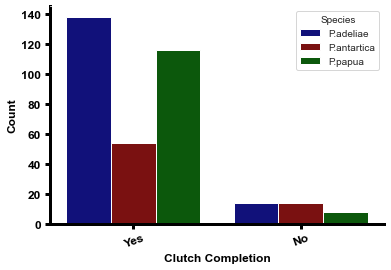

In [10]:
fig, ax=plt.subplots()

sns.countplot(data=new_lter, x='Clutch Completion', hue='Species', palette=['darkblue','darkred', 'darkgreen'])



ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=20)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Clutch Completion', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Clutch.png')

This variable does not differ that much between species, with a majority of all three species achieving clutch completion.

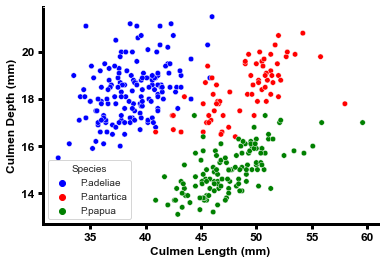

In [11]:
fig, ax=plt.subplots()

sns.scatterplot(data=new_lter, x='Culmen Length (mm)',y='Culmen Depth (mm)', hue='Species', palette=['b','r','g'], s=30)



ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Culmen Length (mm)', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Culmen Depth (mm)', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Culmen.png')

Each species has a separate range of culmen length and culmen depth.

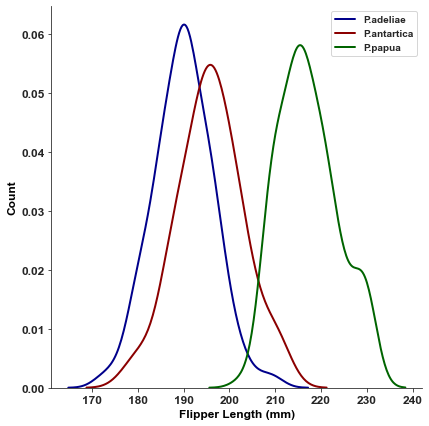

In [12]:
color=['darkblue','darkred','darkgreen']
sns.FacetGrid(data=new_lter, hue="Species", height=6, palette=color)\
    .map(sns.kdeplot, "Flipper Length (mm)", lw=2) 


ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)

plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Flipper Length (mm)', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='k')
plt.legend(fontsize='large',prop={'weight':'bold'})


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Flipper.png')

plt.show()


By species, there is a positive trend towards average flipper length by species. We would expect that a bigger size flipper may indicate that P.papua will be larger than the other two species.

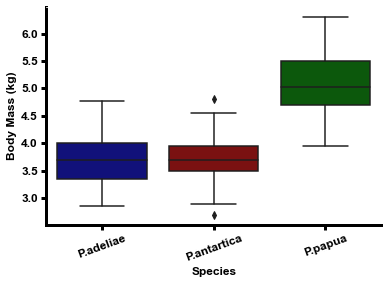

In [13]:
fig, ax=plt.subplots()

sns.boxplot(data=new_lter, x='Species', y='Body Mass (kg)', palette=color)

ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=20)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Species', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Body Mass (kg)', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Species Mass.png')

We see that P.papua weighs more than the other species, indicating a larger size.

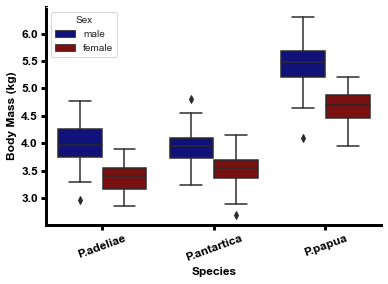

In [14]:
fig, ax=plt.subplots()
sns.boxplot(data=new_lter, x='Species', y='Body Mass (kg)',hue='Sex', palette=color)


ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=20)
plt.yticks(fontsize=12, fontweight='bold')



plt.xlabel('Species', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Body Mass (kg)', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('Gender Mass.png')

We can see that males generally weigh more than females across all species.

We can summarize our findings using a pairplot.

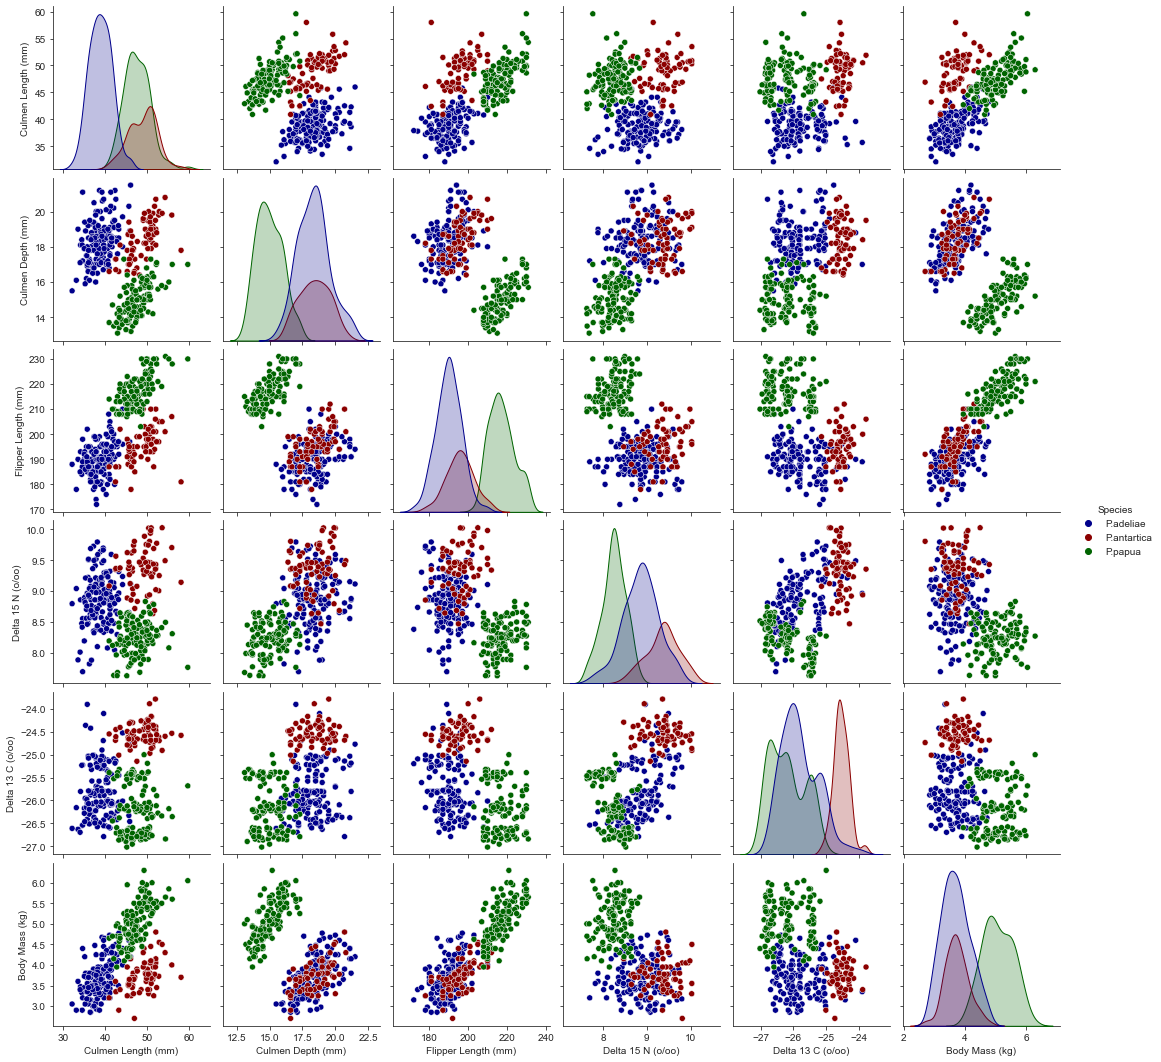

In [15]:
sns.pairplot(new_lter, hue='Species', palette=color)
plt.savefig('pairplot.png')

In [16]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()

In [17]:
lter_encode=new_lter.copy()
lter_encode['Island']=LE.fit_transform(lter_encode['Island'])
lter_encode['Clutch Completion']=LE.fit_transform(lter_encode['Clutch Completion'])
lter_encode['Sex']=LE.fit_transform(lter_encode['Sex'])
lter_encode['Species_Code']=LE.fit_transform(lter_encode['Species']) 
lter_encode.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (kg),Species_Code
0,P.adeliae,2,1,39.100000,18.700000,181.000000,1,8.859733,-25.804194,3.750000,0
1,P.adeliae,2,1,39.500000,17.400000,186.000000,0,8.949560,-24.694540,3.800000,0
2,P.adeliae,2,1,40.300000,18.000000,195.000000,0,8.368210,-25.333020,3.250000,0
3,P.adeliae,2,1,38.791391,18.346358,189.953642,1,8.859733,-25.804194,3.700662,0
4,P.adeliae,2,1,36.700000,19.300000,193.000000,0,8.766510,-25.324260,3.450000,0


## Feature Selection

We will remove features that may be unneccessary.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [19]:
X=lter_encode.drop(['Species', 'Species_Code'], axis=1)
Y=lter_encode['Species']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(12,'Score'))  

               Feature       Score
4  Flipper Length (mm)  602.698860
2   Culmen Length (mm)  415.270432
3    Culmen Depth (mm)  364.366210
8       Body Mass (kg)  348.042484
7    Delta 13 C (o/oo)  236.782300
6    Delta 15 N (o/oo)  232.001825
0               Island  152.172254
1    Clutch Completion    5.012372
5                  Sex    0.091002


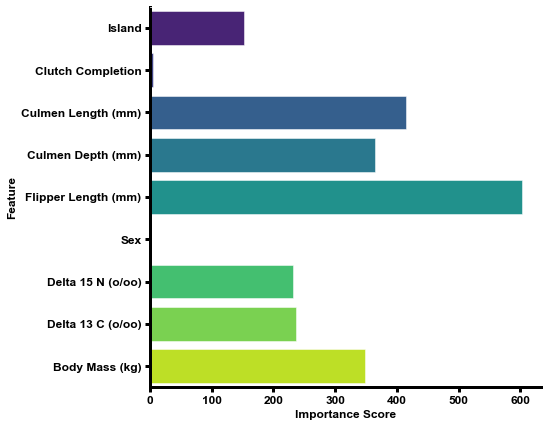

In [20]:

fig, ax = plt.subplots(figsize=(7,7))



bar=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')


ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(fontsize=12, fontweight='bold')


plt.xlabel('Importance Score', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Feature', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('feature selection.png')

The two least important features as shown on the bar plot above are Clutch Completion and Sex. 

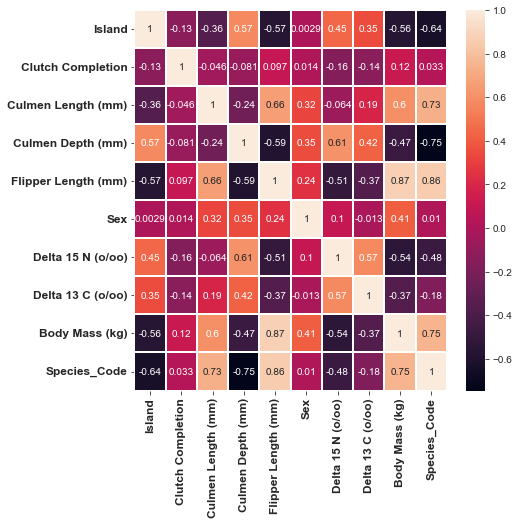

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(lter_encode.corr(),annot=True, linewidths=0.1)
plt.xticks(fontsize=12, fontweight='bold', rotation=90)
plt.yticks(fontsize=12, fontweight='bold')

plt.savefig('correlation matrix.png')
plt.show()

From the heatmap above, we can see which variables have a significant correlation to the target variable Species, variables with a correlation of less than ±(0.5) will be dropped.

In [22]:
lter_encode_drop=lter_encode.copy()
lter_encode_drop=lter_encode_drop.drop(['Sex','Clutch Completion','Species_Code','Delta 13 C (o/oo)', 'Delta 15 N (o/oo)'], axis=1)
lter_encode_drop.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (kg)
0,P.adeliae,2,39.100000,18.700000,181.000000,3.750000
1,P.adeliae,2,39.500000,17.400000,186.000000,3.800000
2,P.adeliae,2,40.300000,18.000000,195.000000,3.250000
3,P.adeliae,2,38.791391,18.346358,189.953642,3.700662
4,P.adeliae,2,36.700000,19.300000,193.000000,3.450000


# One Hot Encoding
We will expand our remaining categorical feature Island in a OHE format.

In [23]:
OHE=preprocessing.OneHotEncoder()
lter_ohe=lter_encode_drop.copy()

lter_code=OHE.fit_transform(lter_ohe[['Island']]).toarray()

lter_list=list(sorted(new_lter['Island'].unique()))  

lter_code=pd.DataFrame(lter_code, columns=lter_list)
lter_ohe=pd.concat([lter_code,lter_ohe], axis=1)

lter_ohe.head()

,Biscoe,Dream,Torgersen,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (kg)
0,0.0,0.0,1.0,P.adeliae,2,39.100000,18.700000,181.000000,3.750000
1,0.0,0.0,1.0,P.adeliae,2,39.500000,17.400000,186.000000,3.800000
2,0.0,0.0,1.0,P.adeliae,2,40.300000,18.000000,195.000000,3.250000
3,0.0,0.0,1.0,P.adeliae,2,38.791391,18.346358,189.953642,3.700662
4,0.0,0.0,1.0,P.adeliae,2,36.700000,19.300000,193.000000,3.450000


As seen above, One Hot Encoding creates a dummy variable scheme that allows for a yes no approach in multiple columns. The data is expanded and can now be further preprocessed by scaling. First, Island will be dropped as it is no longer needed.

In [24]:
lter_ohe=lter_ohe.drop(['Island'], axis=1)
lter_ohe.head()

,Biscoe,Dream,Torgersen,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (kg)
0,0.0,0.0,1.0,P.adeliae,39.100000,18.700000,181.000000,3.750000
1,0.0,0.0,1.0,P.adeliae,39.500000,17.400000,186.000000,3.800000
2,0.0,0.0,1.0,P.adeliae,40.300000,18.000000,195.000000,3.250000
3,0.0,0.0,1.0,P.adeliae,38.791391,18.346358,189.953642,3.700662
4,0.0,0.0,1.0,P.adeliae,36.700000,19.300000,193.000000,3.450000


# Splitting the Data 
First, the data will be split so we can train a scaler model to apply to an unknown (test) data set. 

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(lter_ohe.drop(['Species'], axis=1), lter_ohe['Species'],test_size=0.25, random_state=0)

print("X_train shape :",X_train.shape)
print("Y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",y_test.shape)

X_train shape : (258, 7)
Y_train shape : (258,)
X_test shape : (86, 7)
Y_test shape : (86,)


# Scaling Preprocessing
Next, the data will be scaled by the standard scaler function in the sklearn package using the formula $z=\frac{X_{o}-\mu}{\sigma}$. This can help reduce the effect of outliers when modelling later.

In [26]:
scaler=preprocessing.StandardScaler()

X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.transform(X_test) 

# Dimensionality Reduction With PCA


In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
print('Ratios:',pca.explained_variance_ratio_*100)

Ratios: [5.51954676e+01 2.14419440e+01 1.21388248e+01 5.97392848e+00
 3.82272107e+00 1.42711416e+00 1.37366942e-32]


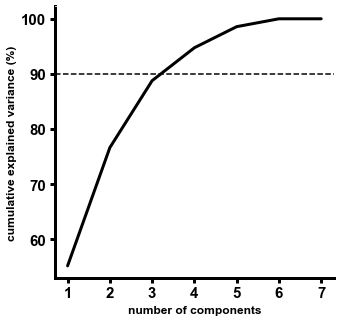

In [28]:
num_com=np.arange(1,(len(pca.explained_variance_ratio_)+1),1)


ratio=np.cumsum(pca.explained_variance_ratio_*100)

fig, ax = plt.subplots(figsize=(5,5))

sns.lineplot(x=num_com, y=ratio, color='k', linewidth=3)


ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

ax.axhline(90, linestyle='--', color='k') 


plt.xlabel('number of components', fontsize=12, fontweight='bold', color='k')
plt.ylabel('cumulative explained variance (%)', fontsize=12, fontweight='bold', color='k')


ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['bottom'].set_color('k')
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('k')
ax.spines['left'].set_linewidth(3)

plt.savefig('PCA.png')

At around 4-5 components there is an cumulative explained variance of >90%. We will select 5 components as four is just <90%. 

In [29]:
n=5 
pca=PCA(n_components=n)

X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

# SVM and Grid/Randomization Search


In [166]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
import itertools 

## Grid Search Function

In [31]:
def Searcher(estimator, param_grid, search, train_x, train_y):  
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, 
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0)
        
    
    clf.fit(X=train_x, y=train_y)

    return clf

## Confusion Matrix Function 

In [32]:
def plot_confusion_matrix(cm, title,label):

    classes=sorted(label)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")   

## Modeling

In [176]:
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100], 
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf","linear""poly"],
    "random_state": [1]}


svm_grid = Searcher(SVC(), svm_param, "grid", X_train_pca, y_train) 
acc = accuracy_score(y_true=y_test, y_pred=svm_grid.predict(X_test_pca))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=svm_grid.predict(X_test_pca))

gridpredictions = svm_grid.predict(X_test_pca)

print(confusion_matrix(y_test, gridpredictions))
print("Best training accuracy:\t", svm_grid.best_score_)
print('Classification Report:')
print(classification_report(y_true=y_test, y_pred=gridpredictions))

[[42  0  0]
 [ 0 14  0]
 [ 0  0 30]]
Best training accuracy:	 0.9961538461538462
Classification Report:
              precision    recall  f1-score   support

   P.adeliae       1.00      1.00      1.00        42
 P.antartica       1.00      1.00      1.00        14
     P.papua       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [177]:
logregpredictions = logreg.predict(X_test_pca)
print("Accuracy Score:", format(metrics.accuracy_score(y_test, gridpredictions)))

Accuracy Score: 1.0


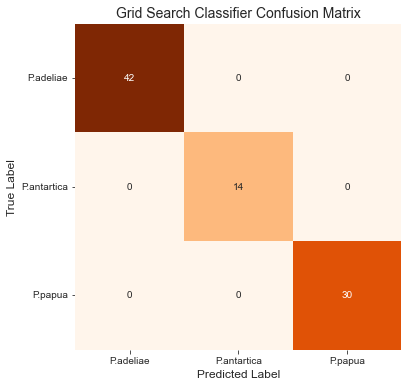

In [175]:
plt.figure(figsize=(6,6))

labels = ['P.adeliae' ,  'P.antartica', 'P.papua']

con_matrix = confusion_matrix(y_test, gridpredictions)
sns.heatmap(con_matrix, cmap='Oranges', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Grid Search Classifier Confusion Matrix', fontsize=14)
plt.show()

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None)
forest.fit(X_train_pca, y_train) 
forest_preds = forest.predict(X_test_pca) 

In [171]:
print(confusion_matrix(y_test, forest_preds))
print(classification_report(y_test, forest_preds))

[[41  1  0]
 [ 0 14  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

   P.adeliae       1.00      0.98      0.99        42
 P.antartica       0.93      1.00      0.97        14
     P.papua       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



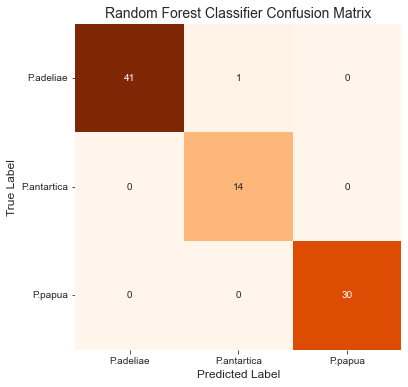

In [152]:
plt.figure(figsize=(6,6))

labels = ['P.adeliae' ,  'P.antartica', 'P.papua']

con_matrix = confusion_matrix(y_test, forest_preds)
sns.heatmap(con_matrix, cmap='Oranges', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=14)
plt.show()

As we can see both methods provided a very high accuracy (almost 100%). Similarly, using the metric of an f1-score there was 100% accuracy showing that the model is well suited for this task. 

# Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [72]:
from sklearn import metrics

dtreepredictions = dtree.predict(X_test_pca)
print("Accuracy Score:", format(metrics.accuracy_score(y_test, dtreepredictions)))

Accuracy Score: 0.9767441860465116


In [169]:
print(confusion_matrix(y_test, dtreepredictions))
print(classification_report(y_test, dtreepredictions))

[[41  1  0]
 [ 1 13  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

   P.adeliae       0.98      0.98      0.98        42
 P.antartica       0.93      0.93      0.93        14
     P.papua       1.00      1.00      1.00        30

    accuracy                           0.98        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



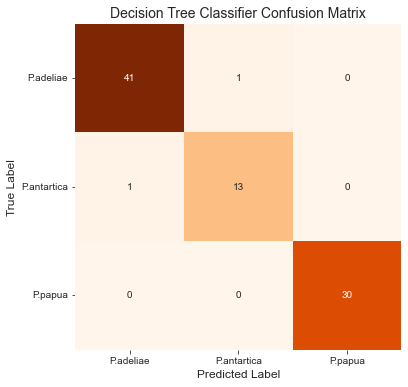

In [151]:
plt.figure(figsize=(6,6))

labels = ['P.adeliae' ,  'P.antartica', 'P.papua']

con_matrix = confusion_matrix(y_test, dtreepredictions)
sns.heatmap(con_matrix, cmap='Oranges', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=14)
plt.show()

# KNN Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [77]:
knnpredictions = knn.predict(X_test_pca)
print("Accuracy Score:", format(metrics.accuracy_score(y_test, knnpredictions)))

Accuracy Score: 0.9883720930232558


In [170]:
print(confusion_matrix(y_test, knnpredictions))
print(classification_report(y_test, knnpredictions))

[[41  1  0]
 [ 0 14  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

   P.adeliae       1.00      0.98      0.99        42
 P.antartica       0.93      1.00      0.97        14
     P.papua       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.98        86
weighted avg       0.99      0.99      0.99        86



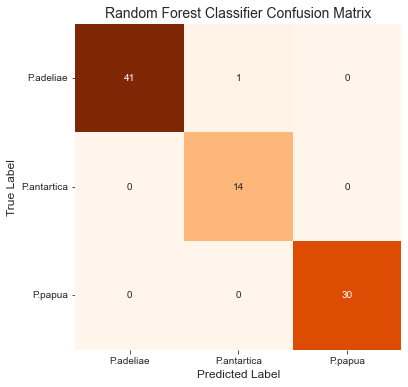

In [149]:
plt.figure(figsize=(6,6))

labels = ['P.adeliae' ,  'P.antartica', 'P.papua']

con_matrix = confusion_matrix(y_test, knnpredictions)
sns.heatmap(con_matrix, cmap='Oranges', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=14)
plt.show()

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

LogisticRegression()

In [69]:
logregpredictions = logreg.predict(X_test_pca)
print("Accuracy Score:", format(metrics.accuracy_score(y_test, logregpredictions)))

Accuracy Score: 1.0


In [70]:
print(confusion_matrix(y_test, logregpredictions))
print(classification_report(y_test, logregpredictions))

[[42  0  0]
 [ 0 14  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

   P.adeliae       1.00      1.00      1.00        42
 P.antartica       1.00      1.00      1.00        14
     P.papua       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



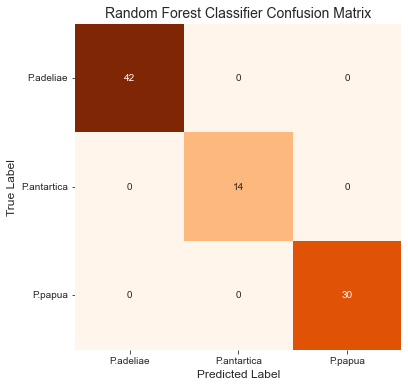

In [148]:
plt.figure(figsize=(6,6))

labels = ['P.adeliae' ,  'P.antartica', 'P.papua']

con_matrix = confusion_matrix(y_test, logregpredictions)
sns.heatmap(con_matrix, cmap='Oranges', annot=True, cbar=False, square=True, 
           xticklabels=labels, 
           yticklabels=labels)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(fontsize=10)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=14)
plt.show()

# Conclusion
* Several features have very distinct values between penguin species whereas others do not.
* Selecting 5 dimensions from PCA provides a cumulative data variance of >90% which contributes enough variability to score a very high prediction accuracy of over 97% for all the tested models.
* We found 2 models with an accuracy of 100% using the given data, Grid Search SVM and Logistic Regression.